## Fine-tuning YOLOv8

### Setup

In [ ]:
!pip install datasets ultralytics

In [20]:
import os
import yaml
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
from ultralytics import YOLO
from PIL import Image

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Dataset

In [ ]:
dataset = load_dataset("kili-technology/plastic_in_river")

In [5]:
os.makedirs("datasets/images/train", exist_ok=True)
os.makedirs("datasets/images/validation", exist_ok=True)
os.makedirs("datasets/labels/train", exist_ok=True)
os.makedirs("datasets/labels/validation", exist_ok=True)

In [6]:
def dump_images_and_labels(data, split):
    data = data[split]
    for i, example in enumerate(data):
        image = example["image"]
        labels = example["litter"]["label"]
        bboxes = example["litter"]["bbox"]
        targets = []
        for label, box in zip(labels, bboxes):
            targets.append(f"{label} {box[0]} {box[1]} {box[2]} {box[3]}")
        with open(f"datasets/labels/{split}/{i}.txt", "w") as f:
            for target in targets:
                f.write(target + "\n")
        image.save(f"datasets/images/{split}/{i}.png")

In [7]:
dump_images_and_labels(dataset, "train")
dump_images_and_labels(dataset, "validation")

### Train

In [8]:
config = {
    "path": ".",
    "train": "images/train",
    "val": "images/validation",
    "names": {
        0: "PLASTIC_BAG",
        1: "PLASTIC_BOTTLE",
        2: "OTHER_PLASTIC_WASTE",
        3: "NOT_PLASTIC_WASTE"
    }
}

with open("plastic.yaml", "w") as f:
    yaml.dump(config, f)

In [ ]:
model = YOLO("yolov8m.pt")
model.train(
    data="plastic.yaml",
    epochs=10,
    imgsz=(1280, 720),
    batch=4,
    optimizer="Adam",
    lr0=1e-3
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 276MB/s]


Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=plastic.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=(1280, 720), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 27.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 128MB/s]


AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=1280'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'


train: Scanning /content/datasets/labels/train... 3407 images, 238 backgrounds, 0 corrupt: 100%|██████████| 3407/3407 [00:21<00:00, 161.52it/s]


train: New cache created: /content/datasets/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/labels/validation... 425 images, 42 backgrounds, 0 corrupt: 100%|██████████| 425/425 [00:02<00:00, 146.12it/s]


val: New cache created: /content/datasets/labels/validation.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.43G      1.712      2.344      1.212         36       1280: 100%|██████████| 852/852 [07:36<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:19<00:00,  2.71it/s]

                   all        425       1460      0.456      0.245      0.217     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.66G      1.679      1.924      1.212         12       1280: 100%|██████████| 852/852 [07:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:18<00:00,  2.94it/s]


                   all        425       1460      0.483      0.265      0.237     0.0918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.65G      1.647      1.843      1.193         11       1280: 100%|██████████| 852/852 [07:27<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.03it/s]


                   all        425       1460      0.347      0.375      0.272      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.66G      1.584      1.731      1.165          3       1280: 100%|██████████| 852/852 [07:25<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.06it/s]


                   all        425       1460      0.297      0.327      0.267      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.66G      1.581      1.696      1.148          3       1280: 100%|██████████| 852/852 [07:26<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:19<00:00,  2.84it/s]

                   all        425       1460      0.316       0.34      0.276      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       7.5G      1.526      1.691       1.15          4       1280: 100%|██████████| 852/852 [07:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:18<00:00,  2.94it/s]

                   all        425       1460      0.317      0.367      0.293      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.17G      1.511      1.557      1.136         11       1280: 100%|██████████| 852/852 [07:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.08it/s]


                   all        425       1460      0.338      0.353      0.299      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.66G      1.479      1.549      1.111         17       1280: 100%|██████████| 852/852 [07:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.05it/s]

                   all        425       1460      0.324      0.365        0.3      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.69G      1.441      1.462      1.095          6       1280: 100%|██████████| 852/852 [07:24<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:18<00:00,  2.92it/s]

                   all        425       1460       0.33      0.388      0.321      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.66G      1.409      1.399      1.089         14       1280:  92%|█████████▏| 785/852 [06:47<00:35,  1.89it/s]

### Predict


0: 736x1280 4 OTHER_PLASTIC_WASTEs, 67.9ms
Speed: 9.7ms preprocess, 67.9ms inference, 2.5ms postprocess per image at shape (1, 3, 736, 1280)


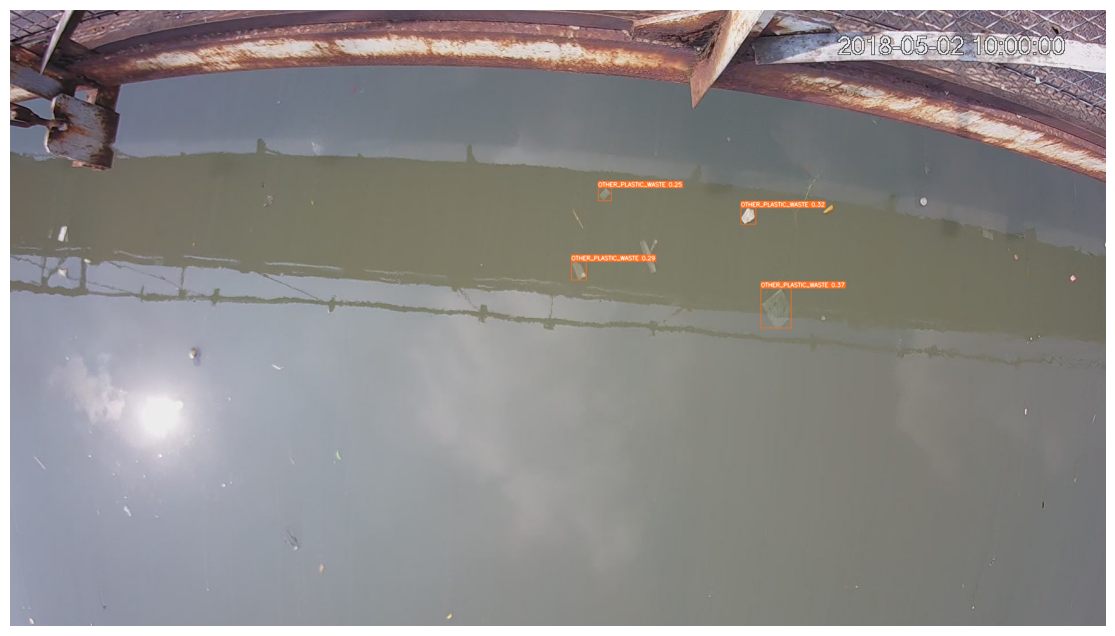

In [39]:
img = dataset["test"][10]["image"]
model = YOLO("runs/detect/train/weights/best.pt")
res = model.predict(img)[0]
res = res.plot(line_width=1)
res = res[:, :, ::-1]
res = Image.fromarray(res)
res.save("output.png")

plt.figure(figsize=(24, 8))
plt.axis("off")
plt.imshow(res);